<a href="https://colab.research.google.com/github/khan5125/PythonPractice/blob/main/Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**
Take Source matrix and create a new matrix with the size of Model matrix, in which each number of the Source matrix will be split into numbers on the corresponding positions and the ratio of the numbers will be same as in the Model matrix. The sum of the cells on the corresponding positions should be equal to the original cell in the Source matrix.

For example, a cell AA in the Source matrix (number 5) will be split into 4 values AaAa, AbAa, AaAb and AbAb. The sum of those values will be AA (5) and the ratio between the numbers will according to the ratios in the Model matrix on positions AaAa, AbAa, AaAb and AbAb, e.g. on position AaAb = 5x90/(76 + 3 + 8 + 90).

Use Python: Perform some tasks;
1. Read the data in,
2. Do the transformation and
3. Save back to Excel.
4. Explain the code in the comments.
5. Use an approach which will be suitable for larger matrices.
6. You may create some type of a conversion kye in Excel and use that in  your preferred environment.

Think about visualization of the results, provide some examples of your suggestions.

#**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Step 1**
**Upload Excel file:** Containing both Source and Model Matrix

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Assignment.xlsx to Assignment (1).xlsx


# **Step 2:**
### Read Source Marix and Model Matrix

In [11]:
# Read both sheets into separate dataframes
source_matrix = pd.read_excel('Assignment1.xlsx', sheet_name = 'smatrix')
model_matrix = pd.read_excel('Assignment1.xlsx', sheet_name = 'mmatrix')

print("smatrix:")
print(source_matrix.head(10))
print("\mmatrix:")
print(model_matrix.head(10))


smatrix:
  Matrix Source   A   B   C   D
0             A   5  32  12  54
1             B   2  12  23  32
2             C  45   3   0  34
3             D  87  57  34  78
\mmatrix:
  Matrix Model  Aa  Ab  Ba  Bb  Bc   C  Da  Dd
0           Aa  76  90  87   3  74  24  12   1
1           Ab   3   8  23   4  12  17  32   9
2           Ba   4   9  12   1  10  32   1   7
3           Bb  21  45  97   9   0  21   9   6
4           Bc  32   1  95   7   4   3   7   8
5            C   1   3  83   6  19   8   6  32
6           Da   2   5  74   8  18   4   8  34
7           Dd   4   0  64  12  26   1  34  78


#**Step 3**
## A. Normalize the model matrix
## B. Transform the source matrix

In [12]:
def scale_matrix(source_value, model_matrix):

    model_sum = np.sum(model_matrix)
    normalized_model = model_matrix / model_sum
    scaled_values = source_value * normalized_model
    return scaled_values

# Example usage with different matrices
source_values = [5, 2, 45, 87, 32, 12, 3, 57, 12, 23, 0, 34, 54, 32, 34, 78]
model_matrices = [
    np.array([[76, 90], [3, 8]]),
    np.array([[4, 9], [21, 45], [32, 1]]),
    np.array([[1, 3]]),
    np.array([[2, 5], [4, 0]]),
    np.array([[87, 3, 74], [23, 4, 12]]),
    np.array([[12, 1, 10], [97, 9, 0], [95, 7, 4]]),
    np.array([[83, 6, 19]]),
    np.array([[74, 8, 18], [64, 12, 26]]),
    np.array([[24], [17]]),
    np.array([[32], [21], [3]]),
    np.array([[8]]),
    np.array([[4], [1]]),
    np.array([[12, 1], [32, 9]]),
    np.array([[1, 7], [9, 6], [7, 8]]),
    np.array([[6], [32]]),
    np.array([[8, 34], [34, 78]]),
]


for i in range(len(source_values)):
    scaled_values = scale_matrix(source_values[i], model_matrices[i])
    print(f"Source Value: {source_values[i]}")
    print("Scaled Values:", scaled_values)
    print("Sum of Scaled Values:", np.sum(scaled_values))
    print("-" * 30)


Source Value: 5
Scaled Values: [[2.14689266 2.54237288]
 [0.08474576 0.2259887 ]]
Sum of Scaled Values: 4.999999999999999
------------------------------
Source Value: 2
Scaled Values: [[0.07142857 0.16071429]
 [0.375      0.80357143]
 [0.57142857 0.01785714]]
Sum of Scaled Values: 2.0
------------------------------
Source Value: 45
Scaled Values: [[11.25 33.75]]
Sum of Scaled Values: 45.0
------------------------------
Source Value: 87
Scaled Values: [[15.81818182 39.54545455]
 [31.63636364  0.        ]]
Sum of Scaled Values: 87.0
------------------------------
Source Value: 32
Scaled Values: [[13.71428571  0.4729064  11.66502463]
 [ 3.62561576  0.63054187  1.89162562]]
Sum of Scaled Values: 31.999999999999996
------------------------------
Source Value: 12
Scaled Values: [[0.61276596 0.05106383 0.5106383 ]
 [4.95319149 0.45957447 0.        ]
 [4.85106383 0.35744681 0.20425532]]
Sum of Scaled Values: 11.999999999999998
------------------------------
Source Value: 3
Scaled Values: [[2.3

# **Step 4**
## Visualize using Heatmap

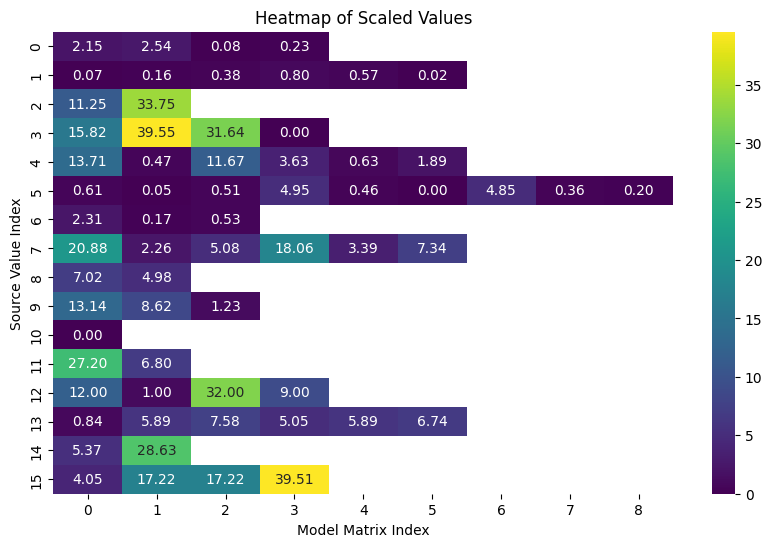

In [17]:
# Assuming 'scaled_values' is a list of NumPy arrays from the previous loop

all_scaled_values = []
for i in range(len(source_values)):
    scaled_values = scale_matrix(source_values[i], model_matrices[i])
    all_scaled_values.append(scaled_values)

# Reshape each scaled_values array to a 1D array
reshaped_values = [arr.reshape(-1) for arr in all_scaled_values]

# Pad the arrays with NaNs to make them the same length
max_len = max(len(arr) for arr in reshaped_values)
padded_values = [np.pad(arr, (0, max_len - len(arr)), 'constant', constant_values=np.nan)
                  for arr in reshaped_values]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(np.array(padded_values), annot=True, cmap="viridis", fmt=".2f")
plt.title("Heatmap of Scaled Values")
plt.xlabel("Model Matrix Index")
plt.ylabel("Source Value Index")
plt.show()

# **Step 5**
## To save excel file

In [16]:
# Create a DataFrame from the results matrix
results_df = pd.DataFrame(np.array(padded_values))

# Export the DataFrame to an Excel file
results_df.to_excel('results_matrix.xlsx', index=False)

# Download the Excel file
files.download('results_matrix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>